## SBU Kinect Data Analysis

In [1]:
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import glob
import os

%matplotlib inline

### Classes

In [2]:
idx_to_label = {
    1 : 'approaching',
    2 : 'departing',
    3 : 'kicking',
    4 : 'pushing',
    5 : 'handshaking',
    6 : 'hugging',
    7 : 'exchanging',
    8 : 'punching',
}

### Data Statistics

In [3]:
videos_per_class = defaultdict(lambda:0)
frames_per_video = OrderedDict()

dataset_dir = "./sbu_dataset"

video_no = 1 # counter to keep track of number of videos
for i in range(1,22): 
    set_no = str(i)
    path_to_set = os.path.join(dataset_dir,set_no)
    part_no = os.listdir(path_to_set)[0] # participant no.
    path_to_part = os.path.join(path_to_set,part_no)
    cats = sorted(os.listdir(path_to_part))[1::]
    
    for cat in cats:
        label = int(cat)
        path_to_cat = os.path.join(path_to_part,cat) # path to category(1-8)
        runs = sorted(os.listdir(path_to_cat)) 
        if runs[0] == '.DS_Store':
            runs = runs[1::]
        
        videos_per_class[label] += len(runs)  
        
        for run in runs:
            run_path = os.path.join(path_to_cat, run)
            num_frames = len(glob.glob(f'{run_path}/rgb*'))
            
            frames_per_video[video_no] = num_frames
            video_no += 1

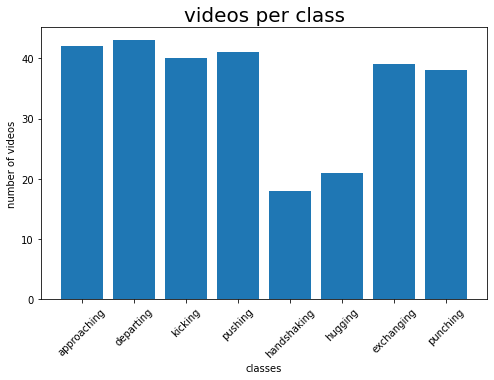

Minimum number of videos for a class : 18
Maximum number of videos for a class : 43
Total number of videos : 282


In [9]:
plt.figure(figsize=(8,5))
plt.title('videos per class', fontdict = {'fontsize':20})
plt.xticks(rotation=45)
plt.xlabel('classes')
plt.ylabel('number of videos')
plt.bar(x = [idx_to_label[idx] for idx in list(videos_per_class.keys())], height = videos_per_class.values())
plt.show()

unique_videos = np.unique(list(videos_per_class.values()))
print(f'Minimum number of videos for a class : {unique_videos[0]}')
print(f'Maximum number of videos for a class : {unique_videos[-1]}')
print(f'Total number of videos : {np.sum(list(videos_per_class.values()))}')

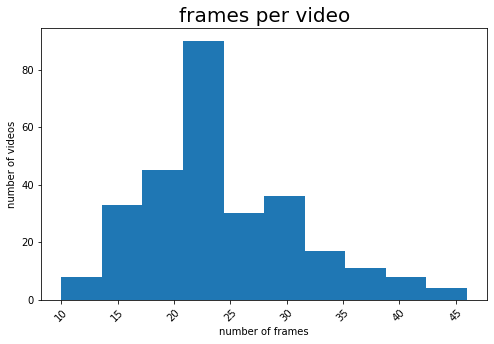

Minimum number of frames : 10
Maximum number of frames : 46


In [5]:
plt.figure(figsize=(8,5))
plt.title('frames per video', fontdict = {'fontsize':20})
plt.xticks(rotation=45)
plt.xlabel('number of frames')
plt.ylabel('number of videos')
plt.hist(x = list(frames_per_video.values()), bins=10)
plt.show()

unique_frames = np.unique(list(frames_per_video.values()))
print(f'Minimum number of frames : {unique_frames[0]}')
print(f'Maximum number of frames : {unique_frames[-1]}')

### Visualize First 15 Frames of All Actions

1) Action : approaching


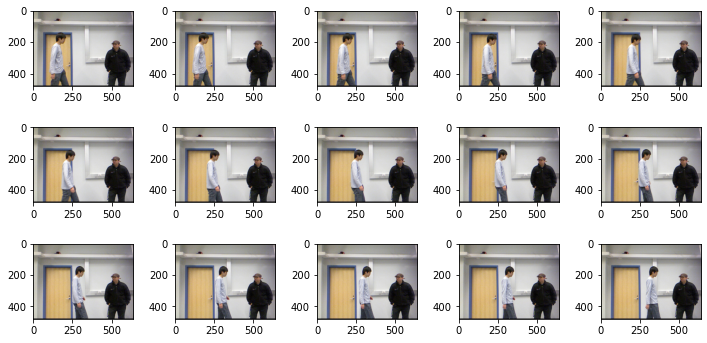

2) Action : departing


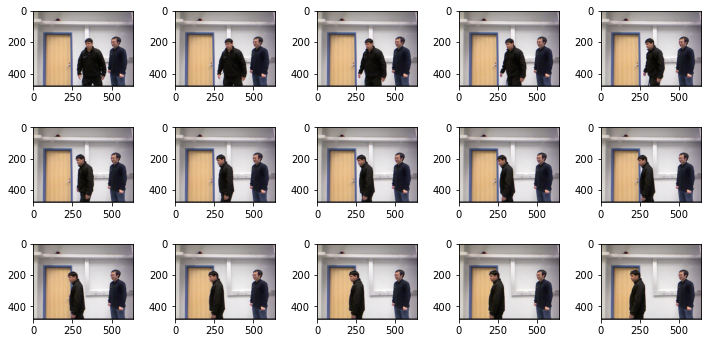

3) Action : kicking


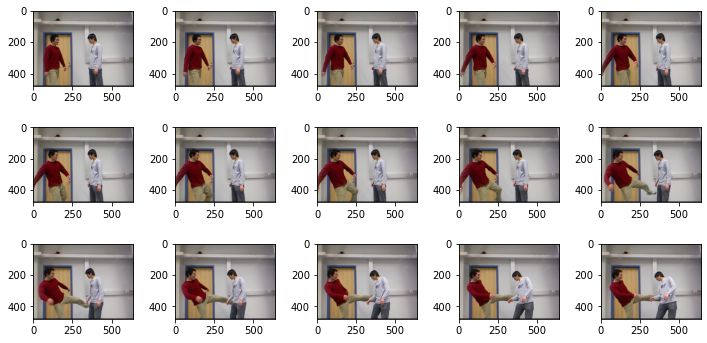

4) Action : pushing


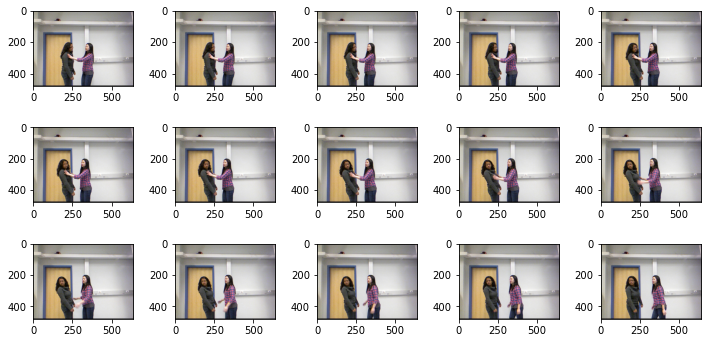

5) Action : handshaking


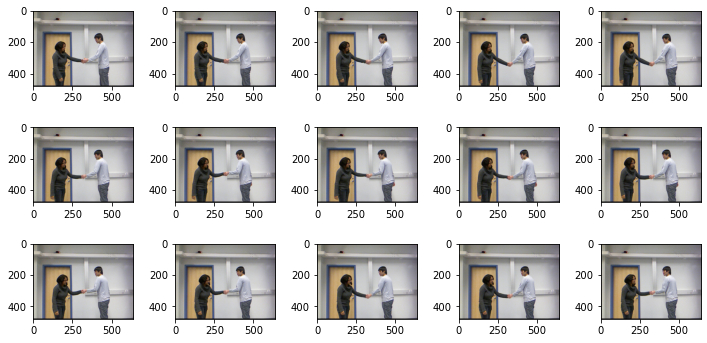

6) Action : hugging


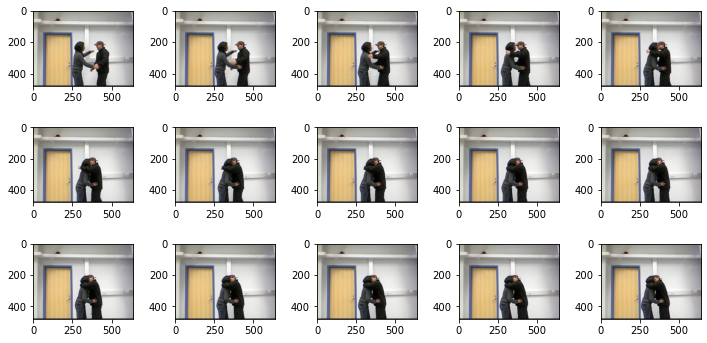

7) Action : exchanging


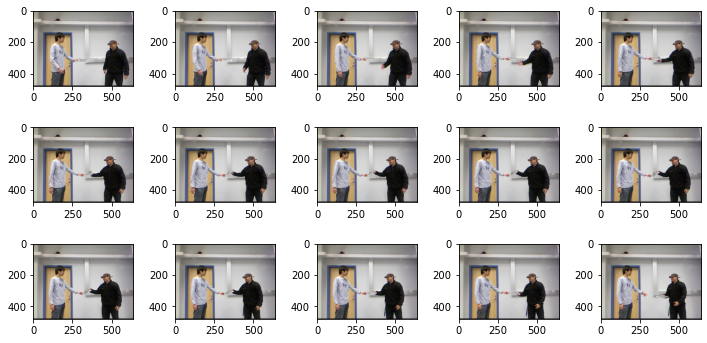

8) Action : punching


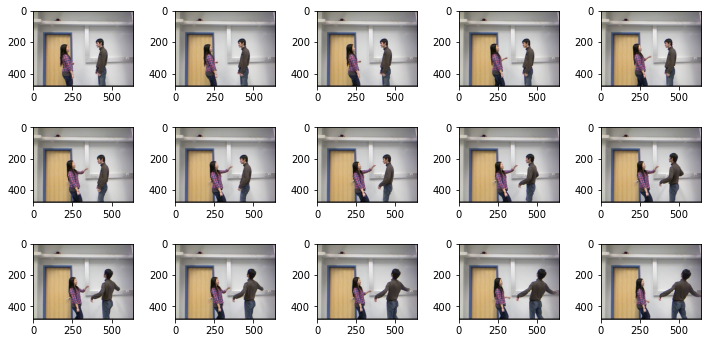

In [6]:
target="./sbu_dataset"


'''set (1-21) - action (1-8) - participant_run (1/2/3)'''
# frames_code = '1-8-1' 


max_frames_to_plot = 15
def plot_frames(frames_code):
    set_no, action, run = frames_code.strip().split('-')
    
    run='%03d' % int(run)
    action = '%02d' % int(action)
    
    set_path = os.path.join(target,set_no)
    stu_names = os.listdir(set_path)[0]
    frames_path = os.path.join(set_path,stu_names,action,run)
    
    rgb_images = sorted(glob.glob(f'{frames_path}/rgb*'))
    
    num_frames = min(len(rgb_images),max_frames_to_plot)
#     print(f'number of frames : {num_frames}')
    
    fig,axs = plt.subplots(nrows=(num_frames-1)//5+1, ncols=5, figsize=(10,5))
    fig.tight_layout()
    
    axs = axs.flatten()
    for ax in axs[num_frames:]:
        ax.set_visible(False)
    
    for i,ax in enumerate(axs):
        img = imread(rgb_images[i])
        ax.imshow(img)
        
    plt.show()
        
np.random.seed(42)
for i in range(1,9):
    print(f'{i}) Action : {idx_to_label[i]}')
    
    set_no = np.random.randint(low = 1, high = 22)
    frames_code = f'{set_no}-{i}-1'
    plot_frames(frames_code)
            